In [1]:
import pandas as pd
import numpy as np
import datetime
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps


In [2]:
df = pd.read_csv('all_clubed.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'uuid', 'datetime', 'cough_detected', 'latitude',
       'longitude', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'quality_1', 'cough_type_1', 'dyspnea_1',
       'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1',
       'diagnosis_1', 'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2',
       'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2',
       'diagnosis_2', 'severity_2', 'quality_3', 'dyspnea_3', 'wheezing_3',
       'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'cough_type_3',
       'diagnosis_3', 'severity_3', 'severity', 'cough_type', 'dyspnea',
       'wheezing', 'stridor', 'quality', 'choking', 'congestion', 'nothing',
       'diagnosis'],
      dtype='object')

In [4]:
resp_status_df= df.dropna(subset=[ 'respiratory_condition', 'status'], inplace=False)[['respiratory_condition', 'status']]

In [5]:
resp_status_df.value_counts(normalize=True)

respiratory_condition  status     
False                  healthy        0.647428
True                   healthy        0.109334
False                  symptomatic    0.103854
                       COVID-19       0.059219
True                   symptomatic    0.050115
                       COVID-19       0.030051
Name: proportion, dtype: float64

In [6]:
print("Null Hypothesis (H0): There is no substantial relationship between the two variables.")  
print("Alternative Hypothesis (H1): There is a substantial relationship between variables.")


Null Hypothesis (H0): There is no substantial relationship between the two variables.
Alternative Hypothesis (H1): There is a substantial relationship between variables.


In [7]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import chi2

data = resp_status_df
data.shape
ct_table_ind=pd.crosstab(data['respiratory_condition'],data["status"])
print('contingency_table :\n',ct_table_ind)
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

alpha = 0.05
print(chi2_stat)
if p>alpha:
    print("Accept H0: There is no relation between two vairables.")
else:
    print("Reject H0: There is a realtion between two variables")


contingency_table :
 status                 COVID-19  healthy  symptomatic
respiratory_condition                                
False                       670     7325         1175
True                        340     1237          567
chi2 statistic:     465.11
p-value:            1.0063e-101
degrees of freedom: 2
expected frequencies:
 [[ 818.60526781 6939.50327028 1411.89146191]
 [ 191.39473219 1622.49672972  330.10853809]]
465.109553112286
Reject H0: There is a realtion between two variables


In [8]:
ct_table_ind.values

array([[ 670, 7325, 1175],
       [ 340, 1237,  567]])

In [9]:
n = np.sum(ct_table_ind.values)  # Total number of observations
min_dim = min(ct_table_ind.shape) - 1  # Number of categories minus 1

cramer_v = np.sqrt(chi2_stat / (n * min_dim))
print(cramer_v)

0.20275405220194795


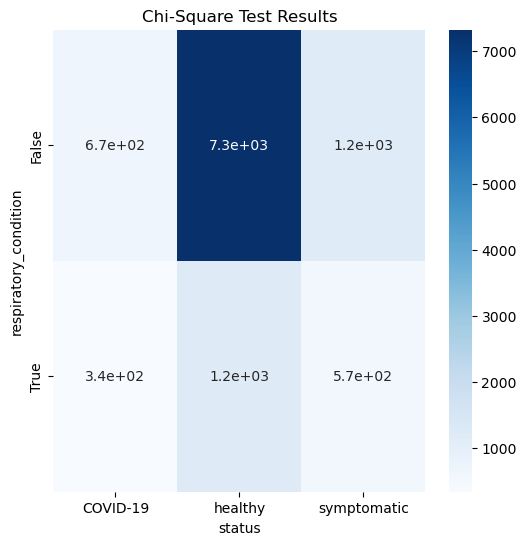

In [10]:
import seaborn as sns
fig = plt.figure(figsize=(6,6))
sns.heatmap(ct_table_ind, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [38]:
gender_status_df

,gender,status
0,male,healthy
1,male,healthy
3,male,healthy
5,female,COVID-19
7,female,healthy
...,...,...
20065,male,healthy
20066,female,healthy
20067,male,healthy
20068,female,symptomatic


In [39]:
# import sweetviz as sv
# report = sv.analyze(gender_status_df)

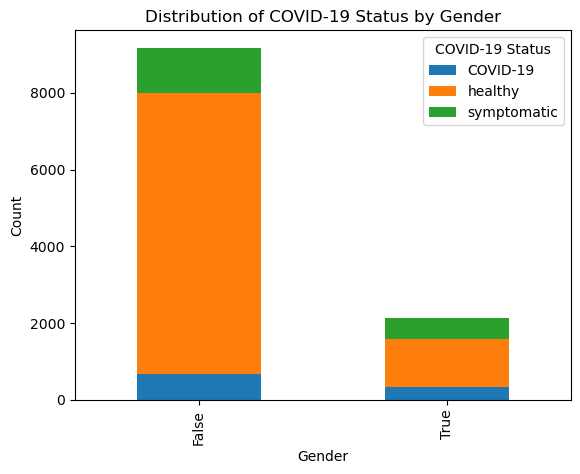

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
contingency_table = pd.crosstab(resp_status_df['respiratory_condition'], resp_status_df['status'])
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='COVID-19 Status')
plt.show()
